# Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

I have made the data my clicking photos of my guitar and my protein box.
All these images are in 108mp

In [1]:
import zipfile

# Path to zip filec
zip_file_path = "guitar_protein.zip"

#Unzip the file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall()

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("guitar_protein"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'guitar_protein'.
There are 2 directories and 0 images in 'guitar_protein\test'.
There are 0 directories and 5 images in 'guitar_protein\test\guitar'.
There are 0 directories and 5 images in 'guitar_protein\test\protein'.
There are 2 directories and 0 images in 'guitar_protein\train'.
There are 0 directories and 10 images in 'guitar_protein\train\guitar'.
There are 0 directories and 10 images in 'guitar_protein\train\protein'.


In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("guitar_protein/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['guitar' 'protein']


In [4]:
# Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random images path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # Show the shape of the image

    return img

['6.jpg']


c:\Users\bharg\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Image shape: (12000, 9000, 3)
['5.jpg']
Image shape: (12000, 9000, 3)


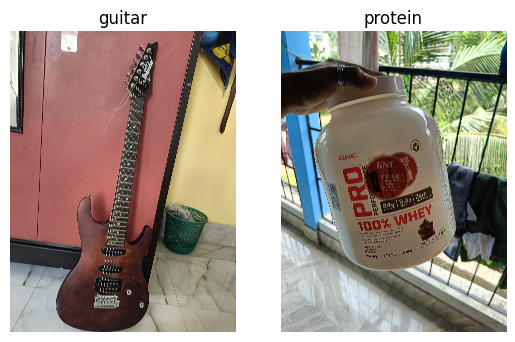

In [5]:
# View a random image from training dataset
plt.figure()
plt.subplot(1, 2, 1)
guitar_image = view_random_image("guitar_protein/train/", "guitar")
plt.subplot(1, 2, 2)
protein_img = view_random_image("guitar_protein/train/", "protein")

In [6]:
train_dir = "guitar_protein/train/"
test_dir = "guitar_protein/test/"

['6.jpg']
Image shape: (12000, 9000, 3)


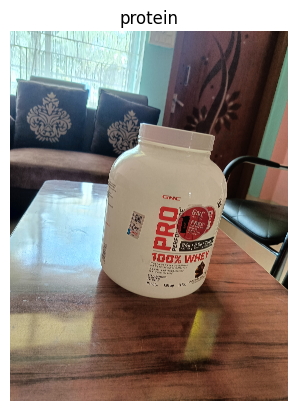

In [7]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [8]:
# Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [9]:
# Create a model
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [10]:
model_1 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

c:\Users\bharg\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/10
1/1 [==============================] - 36s 36s/step - loss: 0.6866 - accuracy: 0.6000 - val_loss: 0.6576 - val_accuracy: 0.8000
Epoch 2/10
1/1 [==============================] - 22s 22s/step - loss: 0.6515 - accuracy: 0.7500 - val_loss: 0.6327 - val_accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 23s 23s/step - loss: 0.6148 - accuracy: 0.8500 - val_loss: 0.6048 - val_accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 24s 24s/step - loss: 0.5742 - accuracy: 1.0000 - val_loss: 0.5718 - val_accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 20s 20s/step - loss: 0.5300 - accuracy: 1.0000 - val_loss: 0.5351 - val_accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 21s 21s/step - loss: 0.4808 - accuracy: 1.0000 - val_loss: 0.4973 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 21s 21s/step - loss: 0.4285 - accuracy: 1.0000 - val_loss: 0.4579 - val_accuracy: 0.8000
Epoch 8/10
1/1 [===========

In [11]:
model_1.evaluate(test_data)

1/1 [==============================] - 7s 7s/step - loss: 0.3492 - accuracy: 0.8000


[0.34915784001350403, 0.800000011920929]

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 10)    280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 10)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0

In [13]:
# Plot the validation and training curves
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel('epochs')
    plt.legend()

    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

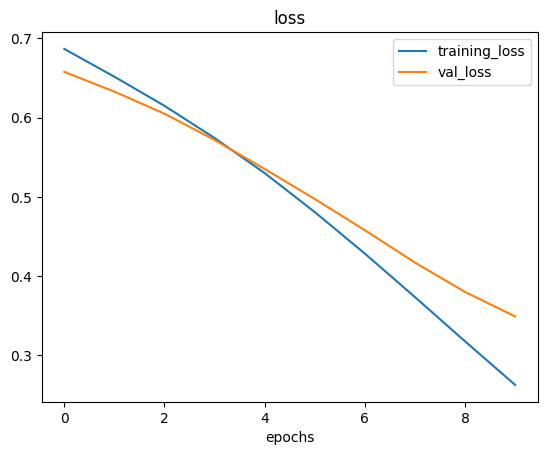

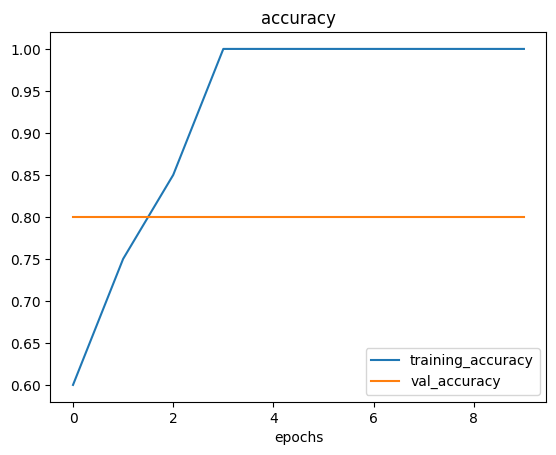

In [14]:
plot_loss_curves(history_1)

In [15]:
class_names

array(['guitar', 'protein'], dtype='<U7')

In [17]:
from tensorflow.keras.utils import load_img

image_path_1 = "C:/Tensorflow/guitar_1.jpg"
image1 = load_img(image_path_1, target_size=(224, 224))  # Resize to fit model input size (adjust as needed)

image_path_2 = "C:/Tensorflow/protein_1.jpg"
image1 = load_img(image_path_2, target_size=(224, 224))


c:\Users\bharg\anaconda3\envs\py310\lib\site-packages\PIL\Image.py:3218: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [18]:
def load_and_prep_image(filename, img_shape=224):
    
    img = tf.io.read_file(filename)
    # Decoce the dead file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image
    img = img/255.

    return img

In [19]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image and located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    print(len(pred[0]))
    print(tf.argmax(pred))
    # Make logic for multi class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 282ms/step
1
tf.Tensor([0], shape=(1,), dtype=int64)


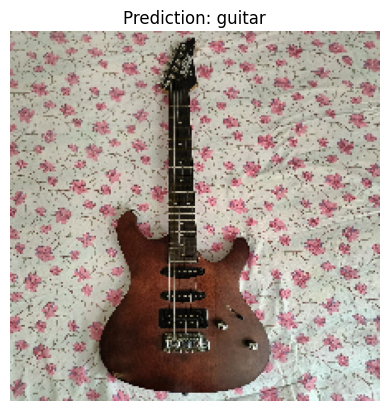

In [20]:
pred_and_plot(model=model_1, filename="guitar_1.jpg", 
              class_names=class_names)

1/1 [==============================] - 0s 46ms/step
1
tf.Tensor([0], shape=(1,), dtype=int64)


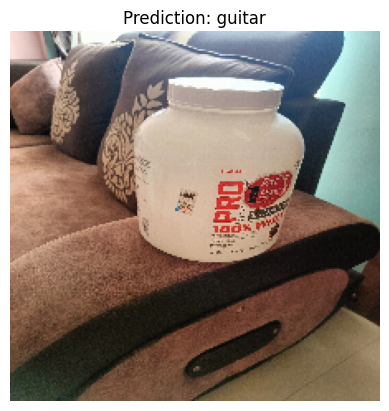

In [21]:
pred_and_plot(model=model_1, filename="protein_1.jpg",
              class_names=class_names)

1/1 [==============================] - 0s 28ms/step
1
tf.Tensor([0], shape=(1,), dtype=int64)


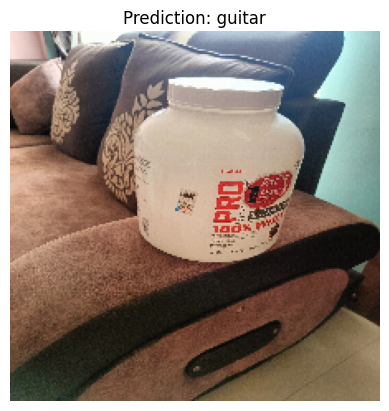

In [22]:
pred_and_plot(model=model_1, filename="protein_1.jpg",
              class_names=class_names)